# Bank Churn Analysis

Kaggle : https://www.kaggle.com/datasets/rangalamahesh/bank-churn?select=train.csv

## Import All Required Python Libraries and Load Data

In [1]:
# Import The Required Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
# Load The Dataset
bank_churn_df = pd.read_csv('train.csv')

## Statistics Data Analysis

In [3]:
# Check The Shape of Data
print("Total Rows", bank_churn_df.shape[0])
print()
print("Total Features", bank_churn_df.shape[1])

Total Rows 165034

Total Features 14


In [4]:
# Check The Data Records
bank_churn_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
# Check Statistics Values for Numerical Values
bank_churn_df[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,112574.822734
std,80.103340,8.867205,2.806159,62817.663278,50292.865585
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,597.000000,32.000000,3.000000,0.000000,74637.570000
50%,659.000000,37.000000,5.000000,0.000000,117948.000000
75%,710.000000,42.000000,7.000000,119939.517500,155152.467500
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


The dataset has the average credit score of approximately of 654.45 and the average person age is 38 years. The balance in the bank account ranges from 0 to  250,898.09, while estimated salaries average around 112,574.82.

In [6]:
# Check The Data Information
bank_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [8]:
# Check Unique Count For Few Categorical Columns
print('Country--', bank_churn_df['Geography'].unique())
print('Gender--', bank_churn_df['Gender'].unique())
print('Number of Products--', bank_churn_df['NumOfProducts'].unique())
print('Has Credit Card--', bank_churn_df['HasCrCard'].unique())

Country-- ['France' 'Spain' 'Germany']
Gender-- ['Male' 'Female']
Number of Products-- [2 1 3 4]
Has Credit Card-- [1. 0.]


## Data Basic Cleaning

In [9]:
# Drop Unwanted Columns
bank_churn_df = bank_churn_df.drop(['id', 'CustomerId', 'Surname'], axis=1)

In [10]:
# Convert HasCrCard And IsActiveMember into int
bank_churn_df['HasCrCard'] = bank_churn_df['HasCrCard'].astype(int)
bank_churn_df['IsActiveMember'] = bank_churn_df['IsActiveMember'].astype(int)

It is done because both are boolean values and going with int type can help for model to understand its datatype.

In [11]:
bank_churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0


## Correlation

In [17]:
# Make Data Copy
bank_churn_df_copy = bank_churn_df.copy()

In [20]:
# Intialise Label Encoding
encode_data = LabelEncoder()

# Apply Label Encoding to Geography And Gender
bank_churn_df_copy['Geography'] = encode_data.fit_transform(bank_churn_df_copy['Geography'])
bank_churn_df_copy['Gender'] = encode_data.fit_transform(bank_churn_df_copy['Gender'])

Label Encoding encodes the object like male, female into numerical values like male-1 and female-0

In [55]:
# Function for Plot
def corr_plot(data):
  """
  Function Working: This plot a heatmap showing the correlation amoing each feature

  Input: Dataframe
  Output: Heatmap
  """

  # Plot Figure
  plt.figure(figsize=(10, 6))

  # Make Heatmap
  sns.heatmap(data.corr(), annot=True, cmap='Blues', fmt=".3f")

  # Add Title
  plt.title('Relation Among Each Feature for Bank Churn')

  # Show Plot

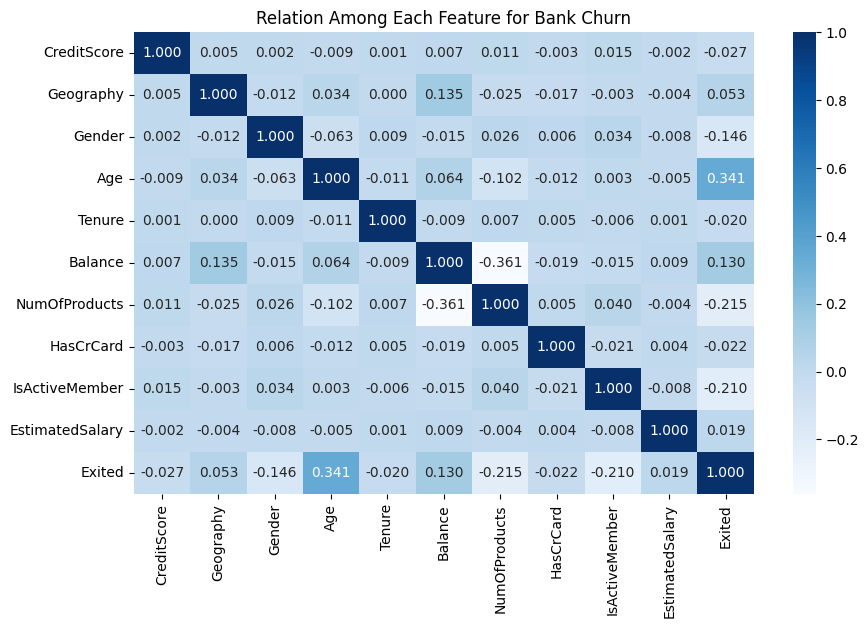

In [56]:
# Call Function
corr_plot(bank_churn_df_copy)

The correlation matrix shows the relation between various features in the dataset related to bank customer to know if the customer exit from bank. Through the observation it is seen that age and exited had a moderate postive correlation of 0.341, indicating that older people are more likely to leave. Also, NumOfProduct and Exited have a negative correlation of -0.214, suggesting less or few products are associated with higher exit rates.  

## Customer Exited Plot

In [28]:
# Function for Plot
def cus_exit(data):
  """
  Function Working: This plot a bar plot to show the distribution of exited and non-exited customer in bank

  Input: Dataframe
  Output: Bar Plot
  """

  # Count Both Class Value
  exit_count = data['Exited'].value_counts()

  # Plot Figure
  plt.figure(figsize=(8, 5))

  # Make Bar Plot
  exit_plot = exit_count.plot(kind='bar', color='skyblue', edgecolor='black')

  # Add Labels
  plt.xlabel('Exited')
  plt.ylabel('Number of Customer')

  # Add Title
  plt.title('Distribution of Bank Customer - Exited and Non-Exited')

  # Annotate The Bars
  for i, count in enumerate(exit_count):
    plt.text(i, count, str(count), ha='center', va='bottom')

  # Show Plot
  plt.show()

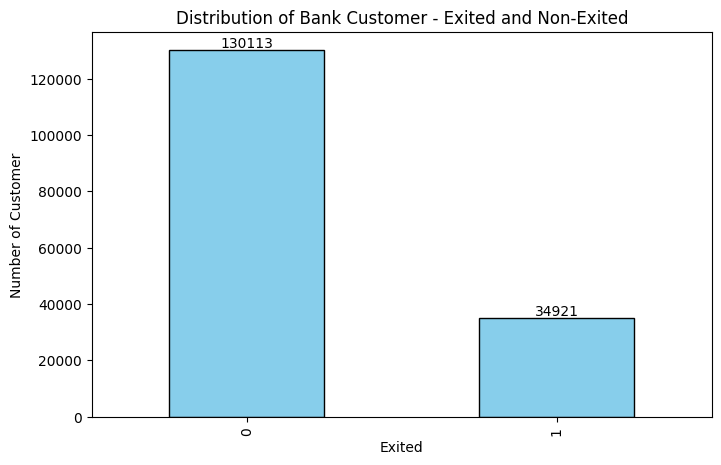

In [29]:
# Call Function
cus_exit(bank_churn_df)

Through the plot the distribution of customer who had exited and not exited plot can be seen where **1 means exited and 0 mean not exited**. The plots displays that for the given dataset larger number of customer have not exited the bank if compared with exited count. This indicates that there is a high retention rate among bank's customers.

## Relation Between Credit Score and Estimated Salary

In [46]:
def cred_salr(data):
  """
  Function Working: This plot a scatter plot to show the relation between credit score and estimated salary range

  Input: Dataframe
  Output: Bar Plot
  """
  # Plot Figure
  plt.figure(figsize=(10, 6))

  # Make Scatter Plot
  plt.scatter(data['CreditScore'], data['EstimatedSalary'], color='skyblue', alpha=0.5)

  # Add Labels
  plt.xlabel('CreditScore')
  plt.ylabel('Estimated Salary')

  # Add Title
  plt.title('Relation Between CreditScore and Estimated Salary')

  # Show Plot
  plt.show()

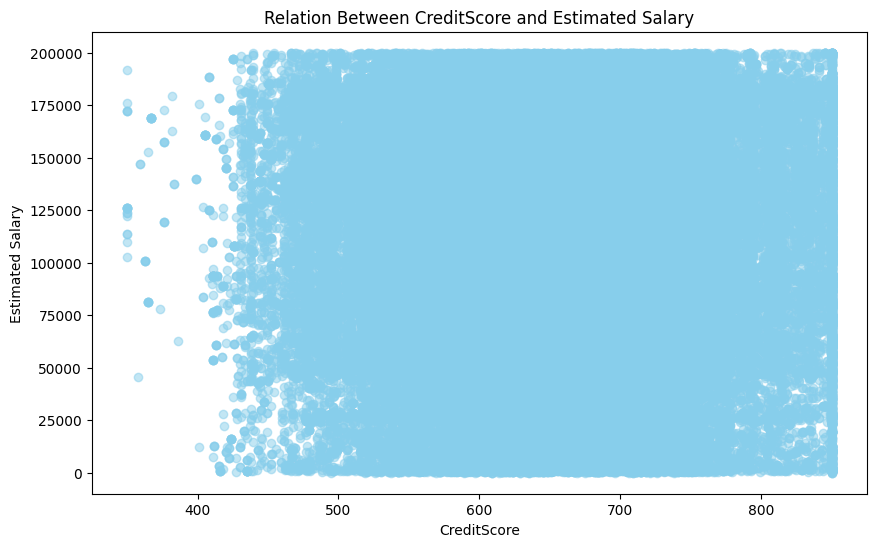

In [47]:
# Call Function
cred_salr(bank_churn_df)

The scatter plot shows the relationship present between credit score and estimated customer salary. The distribution is seem to spread almost equally all, suggesting there is a weak or no linear correlation between this two factors for determing if the customer would exit or not. It also shows that there is a lower credit score value have large number of data point, whereas higher credit score value are widely spread.

## Overview

Based on the analysis, there appears to be a weak linear correlation between credit score and estimated salary in determining customer exit. However, age shows a moderate positive correlation with exit, suggesting older people are more likely to leave. Additionally, fewer products are correlated with higher exit rate.